---
title: "Data Exploratory: Building"
format:
  html:
    toc: false
    page-layout: full
    code-fold: true
    code-tools: true
execute:
  warning: false
---

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import hvplot.pandas
import panel as pn

# Make sure plots show up in JupyterLab!
%matplotlib inline

In [3]:
import holoviews as hv
import geoviews as gv

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
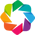

In [4]:
from holoviews.operation.datashader import datashade

hv.extension('bokeh')

## Building Distribution

In [12]:
# please try again if run with error for first time
district_url = (
    'https://services3.arcgis.com/6j1KwZfY2fZrfNMR/arcgis/rest/services/Hong_Kong_18_Districts/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson'
)
hk_limit = gpd.read_file(district_url)
hk_limit.head()

OBJECTID  ID CNAME CNAME_S         ENAME   Shape__Area  Shape__Length  \
0         1   1  黃大仙區    黄大仙区  WONG TAI SIN  1.092784e+07   17995.640782   
1         2   6  九龍城區    九龙城区  KOWLOON CITY  1.184286e+07   31834.409404   
2         3   7   觀塘區     观塘区     KWUN TONG  1.322124e+07   25496.700164   
3         4   8   西貢區     西贡区      SAI KUNG  1.602944e+08  365545.476363   
4         5  11    北區      北区         NORTH  1.619184e+08  192815.532996   

                                            geometry  
0  POLYGON ((114.17942 22.34905, 114.17946 22.349...  
1  MULTIPOLYGON (((114.17700 22.34904, 114.17702 ...  
2  POLYGON ((114.24371 22.28620, 114.24370 22.286...  
3  MULTIPOLYGON (((114.22112 22.35318, 114.22114 ...  
4  MULTIPOLYGON (((114.33576 22.51003, 114.33576 ...

In [7]:
building_raw = gpd.read_file(
    "/Users/hangzhao/Documents/MUSA_550/Final Project/Data/Building.geojson")
building_raw.head()

OBJECTID            LASTUPDATEDATE  BUILDINGID TYPEOFBUILDINGBLOCK  \
0         1 2014-07-01 00:00:00+00:00  1108522404                   T   
1         2 2014-07-01 00:00:00+00:00  1108523034                   T   
2         3 2014-07-01 00:00:00+00:00  1108523019                   T   
3         4 2014-07-01 00:00:00+00:00  1105710522                  OS   
4         5 2014-07-01 00:00:00+00:00  1105710546                  OS   

   BASELEVEL  ROOFLEVEL  BASELEVELDATASOURCE  ROOFLEVELDATASOURCE  \
0       16.9       21.3                    5                    4   
1       15.5       18.0                    5                    5   
2        7.4       12.3                    5                    4   
3        NaN        NaN                    4                    4   
4        NaN        NaN                    4                    4   

  BUILDINGSTATUS  CERTAINTY  Shape__Area  Shape__Length  \
0              E          1    71.640625      34.756858   
1              E          1    74.509766      40.051622   
2              E          1    73.322266      36.024633   
3              E          1    75.222656      34.720149   
4              E          1    46.123047      28.230848   

                                            geometry  
0  POLYGON Z ((113.96350 22.40813 0.00000, 113.96...  
1  POLYGON Z ((113.97897 22.40319 0.00000, 113.97...  
2  POLYGON Z ((113.97356 22.40331 0.00000, 113.97...  
3  POLYGON Z ((113.98813 22.47048 0.00000, 113.98...  
4  POLYGON Z ((114.06630 22.47048 0.00000, 114.06...

In [8]:
# Define some a default plot width & height
plot_width  = 800
plot_height = int(plot_width*7.0/12)

In [9]:
building_raw['x'] = building_raw.geometry.centroid.x
building_raw['y'] = building_raw.geometry.centroid.y

/var/folders/8y/y89rxkzj5bv2c24kw9zjzy9c0000gn/T/ipykernel_5537/3610934947.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_raw['x'] = building_raw.geometry.centroid.x
/var/folders/8y/y89rxkzj5bv2c24kw9zjzy9c0000gn/T/ipykernel_5537/3610934947.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_raw['y'] = building_raw.geometry.centroid.y


In [13]:
districts_map = hk_limit.hvplot.polygons(
    geo=True,
    crs=4326,
    line_color="white",
    fill_alpha=0,
    frame_width=plot_width,
    frame_height=plot_height,
)

In [14]:
points = building_raw.hvplot.points(
    x="x",
    y="y",
    datashade=True, # NEW: tell hvplot to use datashader!
    aggregator=ds.count(), # NEW: how to aggregate
    cmap=fire, 
    geo=True,
    crs=4326, 
    frame_width=plot_width,
    frame_height=plot_height,
    tiles="CartoDark"
)

#gv.tile_sources.CartoDark
points

/Users/hangzhao/mambaforge/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/hangzhao/mambaforge/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/hangzhao/mambaforge/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/hangzhao/mambaforge/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/hangzhao/mambaforge/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/hangzhao/mambaforge/envs/musa-550-fall-2023/lib/python

:DynamicMap   []
   :Overlay
      .Tiles.I :Tiles   [x,y]
      .RGB.I   :RGB   [x,y]   (R,G,B,A)

## Building Density Mapping

In [15]:
join = gpd.sjoin(building_raw, hk_limit, how='right')#, predicate="within")

In [16]:
building_area_by_district = join.groupby('ENAME')['Shape__Area_left'].sum().reset_index()

In [17]:
gdf = pd.merge(
    hk_limit[["geometry", "ENAME"]], building_area_by_district, on="ENAME")

In [18]:
gdf['building_density'] = gdf['Shape__Area_left'] / hk_limit['Shape__Area']

In [19]:
gdf.to_file("building_file.geojson", driver='GeoJSON')

In [20]:
gdf.hvplot(
    c="building_density", 
    frame_width=600,
    frame_height=600,
    cmap="bone_r",
    geo=True, 
    tiles="CartoDark"
)

/Users/hangzhao/mambaforge/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/hangzhao/mambaforge/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/hangzhao/mambaforge/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/hangzhao/mambaforge/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/hangzhao/mambaforge/envs/musa-550-fall-2023/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


:Overlay
   .Tiles.I    :Tiles   [x,y]
   .Polygons.I :Polygons   [Longitude,Latitude]   (building_density)